# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/bank_clients_transactions.csv')

In [ ]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение столбцов к стилю camel_case

In [ ]:
# Прямое переименование
df.columns = [
    'transaction_id', 'customer_id', 'customer_dob', 'cust_gender',
    'cust_location', 'cust_account_balance', 'transaction_date',
    'transaction_time', 'transaction_amount_inr'
]

# Приведение типов данных

In [ ]:
#привести дату к типу datetime

In [ ]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

/tmp/ipython-input-3937442087.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transaction_date'] = pd.to_datetime(df['transaction_date'])


# Поиск дублей и пропусков в данных

In [ ]:
def comprehensive_data_analysis(df):
    print("=== КОМПЛЕКСНЫЙ АНАЛИЗ ДАННЫХ ===")

    # Основная информация
    print(f"Общее количество строк: {len(df)}")
    print(f"Общее количество колонок: {len(df.columns)}")

    # Анализ пропусков
    print("\n--- АНАЛИЗ ПРОПУСКОВ ---")
    missing_total = df.isnull().sum().sum()
    print(f"Всего пропущенных значений: {missing_total}")

    # Анализ дубликатов
    print("\n--- АНАЛИЗ ДУБЛИКАТОВ ---")
    full_duplicates = df.duplicated().sum()
    transaction_duplicates = df.duplicated('transaction_id').sum()

    print(f"Полные дубликаты строк: {full_duplicates}")
    print(f"Дубликаты TransactionID: {transaction_duplicates}")

    # Анализ уникальности
    print("\n--- АНАЛИЗ УНИКАЛЬНОСТИ ---")
    for column in df.columns:
        unique_count = df[column].nunique()
        print(f"{column}: {unique_count} уникальных значений ({unique_count/len(df)*100:.1f}%)")

    return {
        'total_rows': len(df),
        'total_columns': len(df.columns),
        'missing_values': missing_total,
        'full_duplicates': full_duplicates,
        'transaction_duplicates': transaction_duplicates
    }

# Запуск анализа
analysis_results = comprehensive_data_analysis(df)

=== КОМПЛЕКСНЫЙ АНАЛИЗ ДАННЫХ ===
Общее количество строк: 1048567
Общее количество колонок: 9

--- АНАЛИЗ ПРОПУСКОВ ---
Всего пропущенных значений: 7017

--- АНАЛИЗ ДУБЛИКАТОВ ---
Полные дубликаты строк: 0
Дубликаты TransactionID: 0

--- АНАЛИЗ УНИКАЛЬНОСТИ ---
transaction_id: 1048567 уникальных значений (100.0%)
customer_id: 884265 уникальных значений (84.3%)
customer_dob: 17254 уникальных значений (1.6%)
cust_gender: 3 уникальных значений (0.0%)
cust_location: 9355 уникальных значений (0.9%)
cust_account_balance: 161328 уникальных значений (15.4%)
transaction_date: 55 уникальных значений (0.0%)
transaction_time: 81918 уникальных значений (7.8%)
transaction_amount_inr: 93024 уникальных значений (8.9%)


# Исследовательский анализ данных

In [ ]:
# сколько уникальных клиентов?

In [ ]:
# Количество уникальных клиентов
unique_customers = df['customer_id'].nunique()
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 884265


In [ ]:
# сколько в среднем транзакций приходится на одного клиента?

In [ ]:
def transactions_per_customer_report(df):
    """Генерация комплексного отчета о транзакциях на клиента"""

    transactions_per_customer = df.groupby('customer_id').size()
    total_customers = len(transactions_per_customer)
    total_transactions = len(df)

    report = f"""
=== КОМПЛЕКСНЫЙ ОТЧЕТ: ТРАНЗАКЦИИ НА КЛИЕНТА ===
Общее количество клиентов: {total_customers}
Общее количество транзакций: {total_transactions}

ОСНОВНЫЕ СТАТИСТИКИ:
- Среднее количество транзакций: {transactions_per_customer.mean():.2f}
- Медианное количество транзакций: {transactions_per_customer.median():.2f}

РАСПРЕДЕЛЕНИЕ:
- 1 транзакция: {(transactions_per_customer == 1).sum():>4} клиентов ({(transactions_per_customer == 1).sum()/total_customers*100:5.1f}%)
- 2-3 транзакции: {((transactions_per_customer >= 2) & (transactions_per_customer <= 3)).sum():>4} клиентов ({((transactions_per_customer >= 2) & (transactions_per_customer <= 3)).sum()/total_customers*100:5.1f}%)
- 4-10 транзакций: {((transactions_per_customer >= 4) & (transactions_per_customer <= 10)).sum():>4} клиентов ({((transactions_per_customer >= 4) & (transactions_per_customer <= 10)).sum()/total_customers*100:5.1f}%)
- Более 10 транзакций: {(transactions_per_customer > 10).sum():>4} клиентов ({(transactions_per_customer > 10).sum()/total_customers*100:5.1f}%)

ТОП АКТИВНЫХ КЛИЕНТОВ:
"""

    # Топ 5 самых активных клиентов
    top_customers = transactions_per_customer.sort_values(ascending=False).head()
    for i, (customer_id, count) in enumerate(top_customers.items(), 1):
        report += f"{i}. Клиент {customer_id}: {count} транзакций\n"

    print(report)

    return transactions_per_customer

# Запуск отчета
transactions_stats = transactions_per_customer_report(df)


=== КОМПЛЕКСНЫЙ ОТЧЕТ: ТРАНЗАКЦИИ НА КЛИЕНТА ===
Общее количество клиентов: 884265
Общее количество транзакций: 1048567

ОСНОВНЫЕ СТАТИСТИКИ:
- Среднее количество транзакций: 1.19
- Медианное количество транзакций: 1.00

РАСПРЕДЕЛЕНИЕ:
- 1 транзакция: 740653 клиентов ( 83.8%)
- 2-3 транзакции: 141749 клиентов ( 16.0%)
- 4-10 транзакций: 1863 клиентов (  0.2%)
- Более 10 транзакций:    0 клиентов (  0.0%)

ТОП АКТИВНЫХ КЛИЕНТОВ:
1. Клиент C1026833: 6 транзакций
2. Клиент C5531319: 6 транзакций
3. Клиент C1113684: 6 транзакций
4. Клиент C3226689: 6 транзакций
5. Клиент C6735477: 6 транзакций



In [ ]:
# изучить распределение и размах величин CustAccountBalance и TransactionAmount

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Базовые статистики
print("=== БАЗОВЫЕ СТАТИСТИКИ ===")
print("CustAccountBalance:")
print(df['cust_account_balance'].describe())
print(f"\nПропуски: {df['cust_account_balance'].isnull().sum()}")

print("\nTransactionAmount:")
print(df['transaction_amount_inr'].describe())
print(f"\nПропуски: {df['transaction_amount_inr'].isnull().sum()}")

=== БАЗОВЫЕ СТАТИСТИКИ ===
CustAccountBalance:
count    1.046198e+06
mean     1.154035e+05
std      8.464854e+05
min      0.000000e+00
25%      4.721760e+03
50%      1.679218e+04
75%      5.765736e+04
max      1.150355e+08
Name: cust_account_balance, dtype: float64

Пропуски: 2369

TransactionAmount:
count    1.048567e+06
mean     1.574335e+03
std      6.574743e+03
min      0.000000e+00
25%      1.610000e+02
50%      4.590300e+02
75%      1.200000e+03
max      1.560035e+06
Name: transaction_amount_inr, dtype: float64

Пропуски: 0


In [ ]:
# изучить возраст клиентов (визуализировать)

In [ ]:
# Очистка некорректных значений
print("=== ОЧИСТКА ДАННЫХ ===")
initial_count = len(df)

# Удаляем явные аномалии (возраст меньше 18 или больше 100)
df = df[(df['customer_age'] >= 18) & (df['customer_age'] <= 100)]

print(f"Удалено записей: {initial_count - len(df)}")
print(f"Осталось записей: {len(df)}")
print(f"Новый диапазон возраста: {df['customer_age'].min()} - {df['customer_age'].max()}")

=== ОЧИСТКА ДАННЫХ ===
Удалено записей: 0
Осталось записей: 882438
Новый диапазон возраста: 18.0 - 50.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Создаем колонку с возрастом
df['customer_age'] = (pd.to_datetime('today') - pd.to_datetime(df['customer_dob'])).dt.days // 365

# Проверяем результат
print("=== ПРЕОБРАЗОВАНИЕ ВОЗРАСТА ===")
print(f"Минимальный возраст: {df['customer_age'].min()}")
print(f"Максимальный возраст: {df['customer_age'].max()}")
print(f"Средний возраст: {df['customer_age'].mean():.1f}")
print("\nПервые 5 значений:")
print(df[['customer_dob', 'customer_age']].head())

/tmp/ipython-input-2626939684.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['customer_age'] = (pd.to_datetime('today') - pd.to_datetime(df['customer_dob'])).dt.days // 365


=== ПРЕОБРАЗОВАНИЕ ВОЗРАСТА ===
Минимальный возраст: 18
Максимальный возраст: 50
Средний возраст: 37.6

Первые 5 значений:
  customer_dob  customer_age
0      10/1/94            31
2     26/11/96            29
4      24/3/88            37
6      26/1/92            33
7      27/1/82            43


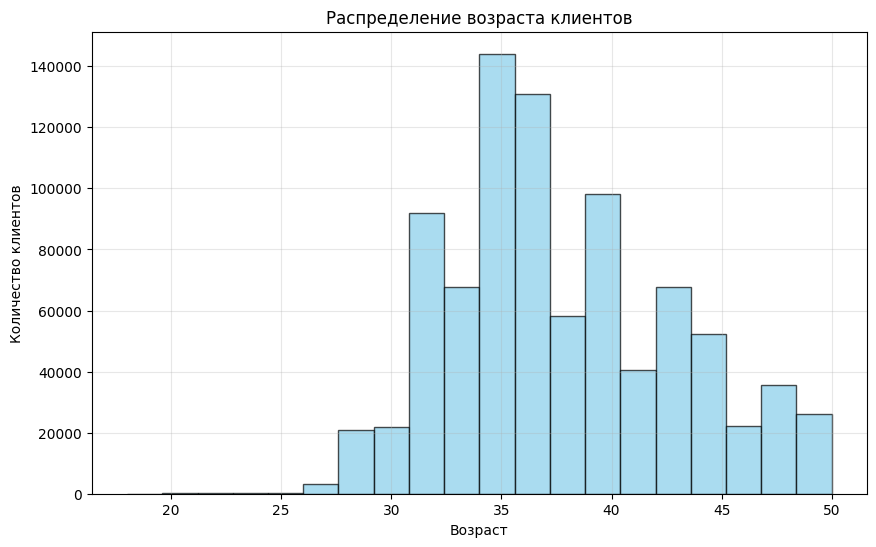

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['customer_age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# изучить пол клиентов (визуализировать)

=== АНАЛИЗ ПО ПОЛУ ===
                count       mean       std   min   25%   50%   75%   max
cust_gender                                                             
F            244754.0  37.030173  5.003608  18.0  33.0  36.0  40.0  50.0
M            637671.0  37.857281  5.208300  18.0  34.0  37.0  41.0  50.0


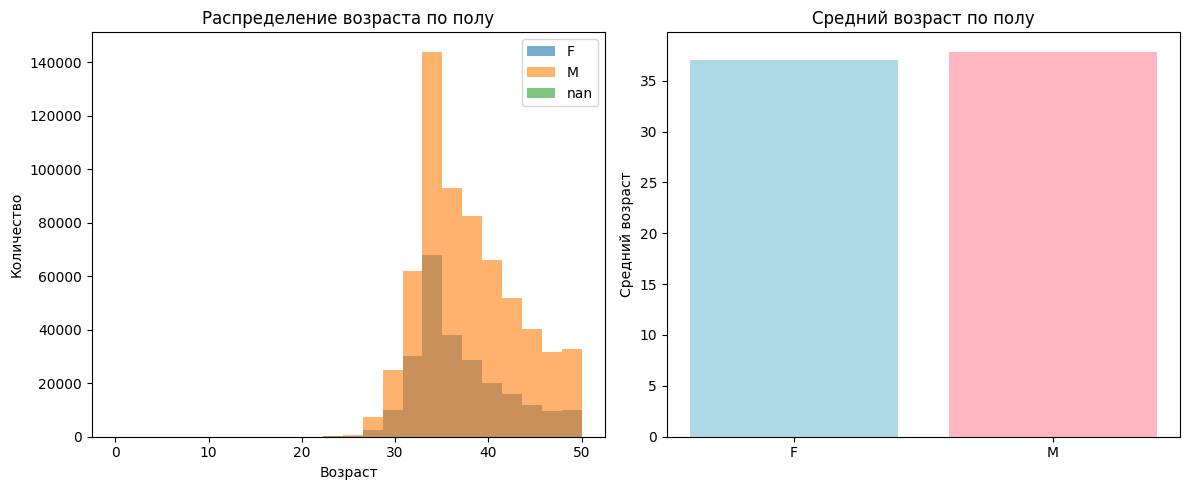

In [ ]:
if 'cust_gender' in df.columns:
    print("=== АНАЛИЗ ПО ПОЛУ ===")

    # Статистика по полу
    gender_stats = df.groupby('cust_gender')['customer_age'].describe()
    print(gender_stats)

    # Визуализация
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for gender in df['cust_gender'].unique():
        gender_data = df[df['cust_gender'] == gender]['customer_age']
        plt.hist(gender_data, bins=15, alpha=0.6, label=gender)
    plt.title('Распределение возраста по полу')
    plt.xlabel('Возраст')
    plt.ylabel('Количество')
    plt.legend()

    plt.subplot(1, 2, 2)
    mean_age_by_gender = df.groupby('cust_gender')['customer_age'].mean()
    plt.bar(mean_age_by_gender.index, mean_age_by_gender.values, color=['lightblue', 'lightpink'])
    plt.title('Средний возраст по полу')
    plt.ylabel('Средний возраст')

    plt.tight_layout()
    plt.show()

In [ ]:
# изучить место жительства клиентов (визуализировать)

In [ ]:
# Анализируем данные о месте жительства
print("=== АНАЛИЗ МЕСТА ЖИТЕЛЬСТВА КЛИЕНТОВ ===")
print(f"Колонка с локацией: {df['cust_location'].head()}")
print(f"Уникальных локаций: {df['cust_location'].nunique()}")
print(f"Пропущенных значений: {df['cust_location'].isnull().sum()}")

# Топ-10 самых частых локаций
top_locations = df['cust_location'].value_counts().head(10)
print("\nТоп-10 самых частых локаций:")
print(top_locations)

=== АНАЛИЗ МЕСТА ЖИТЕЛЬСТВА КЛИЕНТОВ ===
Колонка с локацией: 0     JAMSHEDPUR
2         MUMBAI
4    NAVI MUMBAI
6         MUMBAI
7         MUMBAI
Name: cust_location, dtype: object
Уникальных локаций: 7512
Пропущенных значений: 111

Топ-10 самых частых локаций:
cust_location
MUMBAI       86582
BANGALORE    70832
NEW DELHI    66381
GURGAON      62873
DELHI        60739
NOIDA        28694
CHENNAI      23379
PUNE         22078
HYDERABAD    19853
THANE        18969
Name: count, dtype: int64


In [ ]:
# Создаем DataFrame для визуализации
location_counts = df['cust_location'].value_counts()

# Для удобства визуализации ограничимся топ-15 локациями
top_15_locations = location_counts.head(15)
other_locations_count = location_counts[15:].sum()

print(f"Топ-15 локаций покрывают: {top_15_locations.sum()} клиентов")
print(f"Остальные локации: {other_locations_count} клиентов")

Топ-15 локаций покрывают: 518499 клиентов
Остальные локации: 363828 клиентов


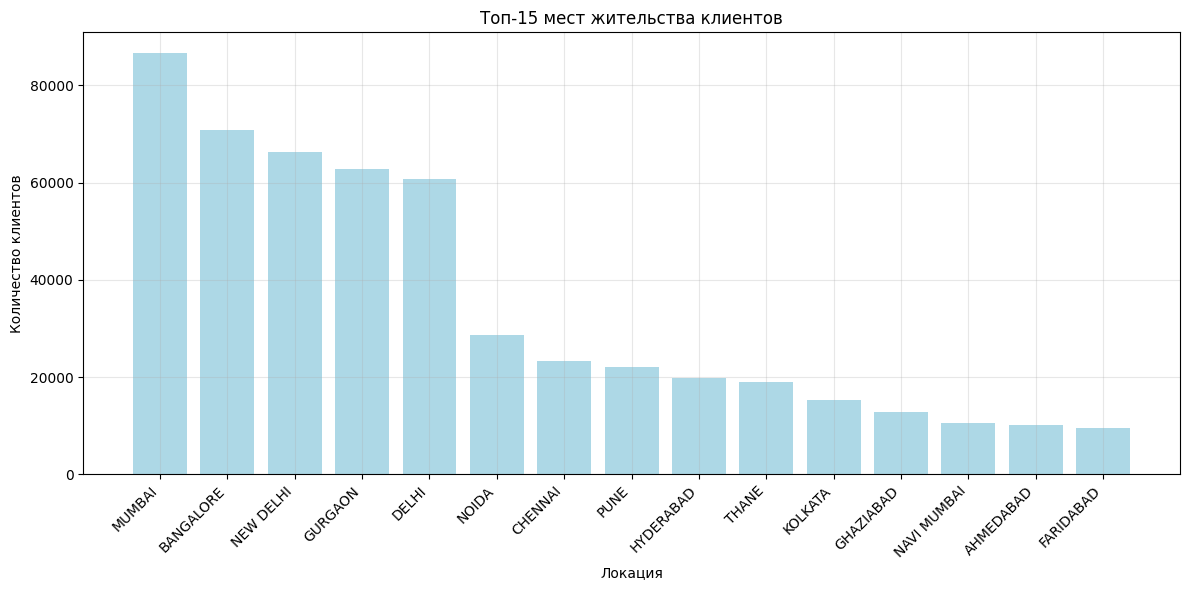

In [ ]:
# Столбчатая диаграмма топ-15 локаций
plt.figure(figsize=(12, 6))
plt.bar(top_15_locations.index, top_15_locations.values, color='lightblue')
plt.title('Топ-15 мест жительства клиентов')
plt.xlabel('Локация')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# посмотреть динамику транзакций по дате (в кол-ве TransactionID)

In [ ]:
# Преобразуем дату в правильный формат
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Создаем отдельные колонки для года, месяца и дня
df['transaction_year'] = df['transaction_date'].dt.year
df['transaction_month'] = df['transaction_date'].dt.month
df['transaction_day'] = df['transaction_date'].dt.day
df['transaction_weekday'] = df['transaction_date'].dt.day_name()

print("=== ИНФОРМАЦИЯ О ДАТАХ ===")
print(f"Период данных: {df['transaction_date'].min()} - {df['transaction_date'].max()}")
print(f"Всего дней: {df['transaction_date'].dt.date.nunique()}")
print(f"Количество транзакций: {len(df)}")

=== ИНФОРМАЦИЯ О ДАТАХ ===
Период данных: 2016-01-08 00:00:00 - 2016-12-09 00:00:00
Всего дней: 55
Количество транзакций: 882438


=== ДИНАМИКА ПО ДНЯМ ===
Дней с транзакциями: 55
Среднее транзакций в день: 16044.3
Максимум транзакций в день: 23406
Минимум транзакций в день: 2


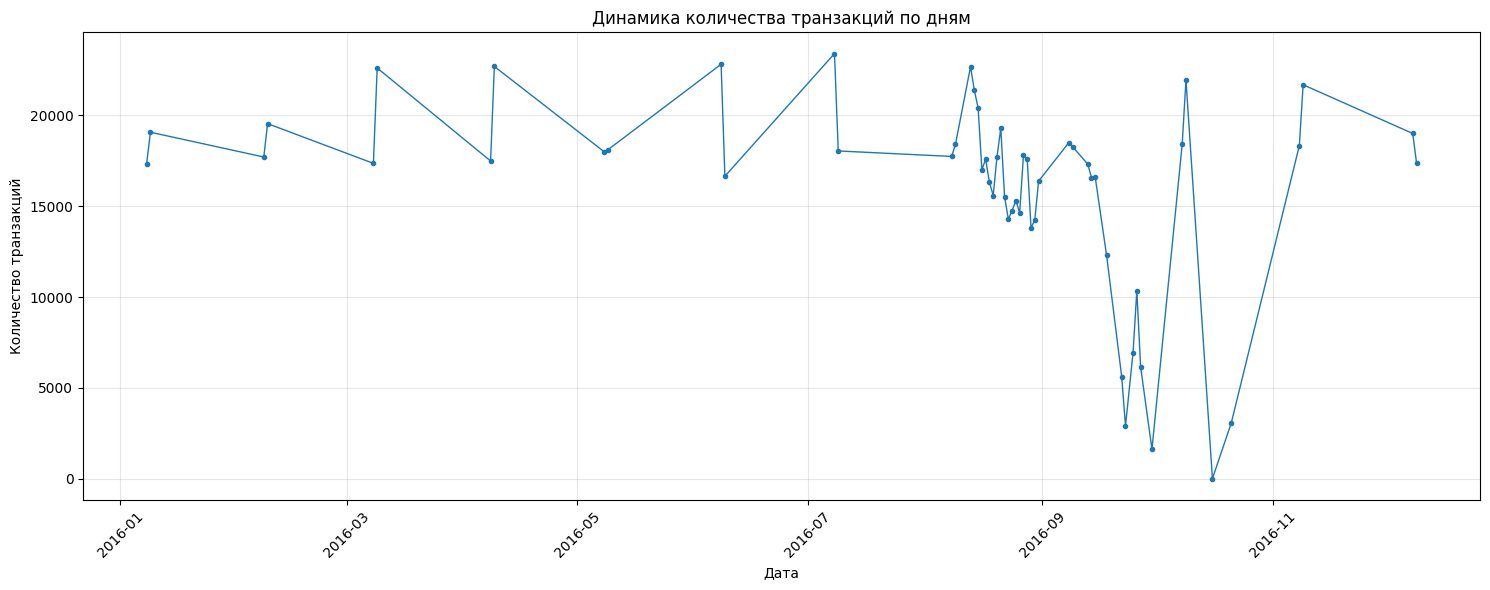

In [ ]:
# Группируем по дате и считаем количество транзакций
daily_transactions = df.groupby(df['transaction_date'].dt.date).size()

print("=== ДИНАМИКА ПО ДНЯМ ===")
print(f"Дней с транзакциями: {len(daily_transactions)}")
print(f"Среднее транзакций в день: {daily_transactions.mean():.1f}")
print(f"Максимум транзакций в день: {daily_transactions.max()}")
print(f"Минимум транзакций в день: {daily_transactions.min()}")

# Визуализация по дням
plt.figure(figsize=(15, 6))
plt.plot(daily_transactions.index, daily_transactions.values, marker='o', linewidth=1, markersize=3)
plt.title('Динамика количества транзакций по дням')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== ДИНАМИКА ПО ДНЯМ НЕДЕЛИ ===
transaction_weekday
Monday       113677
Tuesday      142676
Wednesday    132438
Thursday     107981
Friday       131759
Saturday     136439
Sunday       117468
dtype: int64


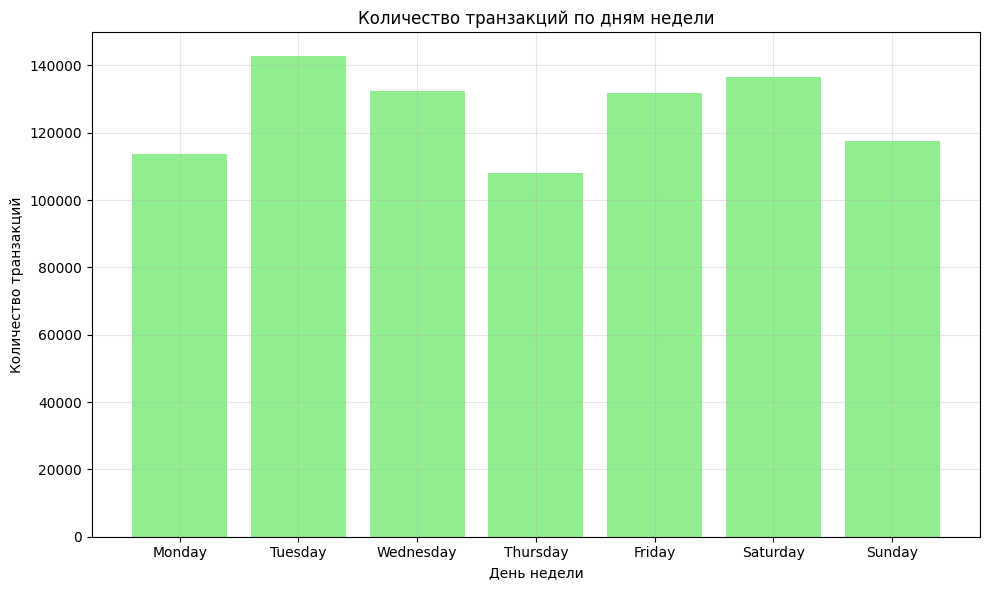

In [ ]:
# Группируем по дням недели
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_transactions = df.groupby('transaction_weekday').size().reindex(weekday_order)

print("=== ДИНАМИКА ПО ДНЯМ НЕДЕЛИ ===")
print(weekday_transactions)

# Визуализация по дням недели
plt.figure(figsize=(10, 6))
plt.bar(weekday_transactions.index, weekday_transactions.values, color='lightgreen')
plt.title('Количество транзакций по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество транзакций')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Финальный отчет
print("=== ФИНАЛЬНЫЙ ОТЧЕТ ПО ДИНАМИКЕ ТРАНЗАКЦИЙ ===")
print(f"Общий период: {df['transaction_date'].min().date()} - {df['transaction_date'].max().date()}")
print(f"Всего транзакций: {len(df)}")
print(f"Всего дней с транзакциями: {daily_transactions.shape[0]}")
print(f"Среднее в день: {daily_transactions.mean():.1f}")
print(f"Самый активный день: {daily_transactions.idxmax()} ({daily_transactions.max()} транзакций)")
print(f"Самый тихий день: {daily_transactions.idxmin()} ({daily_transactions.min()} транзакций)")

if 'transaction_weekday' in df.columns:
    most_active_weekday = weekday_transactions.idxmax()
    print(f"Самый активный день недели: {most_active_weekday} ({weekday_transactions[most_active_weekday]} транзакций)")

=== ФИНАЛЬНЫЙ ОТЧЕТ ПО ДИНАМИКЕ ТРАНЗАКЦИЙ ===
Общий период: 2016-01-08 - 2016-12-09
Всего транзакций: 882438
Всего дней с транзакциями: 55
Среднее в день: 16044.3
Самый активный день: 2016-07-08 (23406 транзакций)
Самый тихий день: 2016-10-16 (2 транзакций)
Самый активный день недели: Tuesday (142676 транзакций)


In [ ]:
# посмотреть динамику транзакций по дате (в сумме TransactionAmount)

In [ ]:
# Преобразуем дату в правильный формат (если еще не сделано)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

print("=== ИНФОРМАЦИЯ О ДАННЫХ ===")
print(f"Период данных: {df['transaction_date'].min()} - {df['transaction_date'].max()}")
print(f"Всего транзакций: {len(df)}")
print(f"Общая сумма транзакций: {df['transaction_amount_inr'].sum():,.2f} INR")
print(f"Средняя сумма транзакции: {df['transaction_amount_inr'].mean():,.2f} INR")

=== ИНФОРМАЦИЯ О ДАННЫХ ===
Период данных: 2016-01-08 00:00:00 - 2016-12-09 00:00:00
Всего транзакций: 882438
Общая сумма транзакций: 1,122,658,777.85 INR
Средняя сумма транзакции: 1,272.22 INR


=== ДИНАМИКА СУММ ПО ДНЯМ ===
Дней с транзакциями: 55
Средняя сумма в день: 20,411,977.78 INR
Максимальная сумма в день: 34,827,171.19 INR
Минимальная сумма в день: 1,042.00 INR


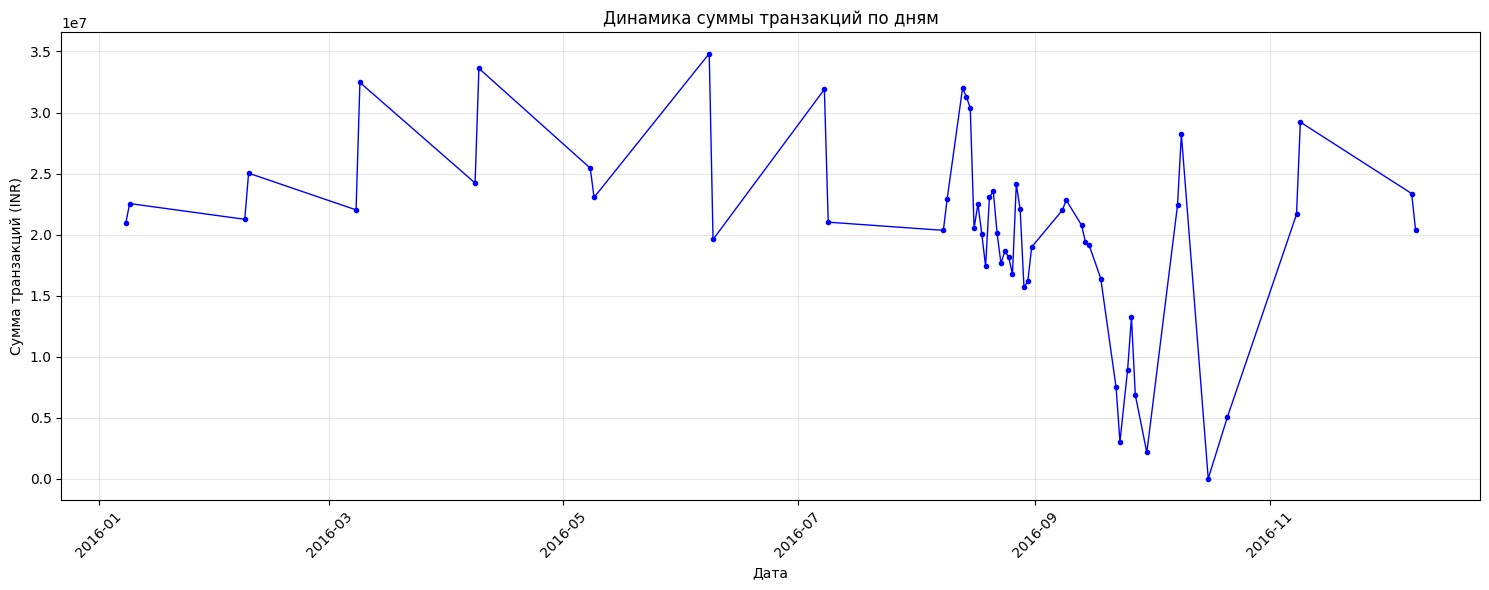

In [ ]:
# Группируем по дате и суммируем amount
daily_amounts = df.groupby(df['transaction_date'].dt.date)['transaction_amount_inr'].sum()

print("=== ДИНАМИКА СУММ ПО ДНЯМ ===")
print(f"Дней с транзакциями: {len(daily_amounts)}")
print(f"Средняя сумма в день: {daily_amounts.mean():,.2f} INR")
print(f"Максимальная сумма в день: {daily_amounts.max():,.2f} INR")
print(f"Минимальная сумма в день: {daily_amounts.min():,.2f} INR")

# Визуализация сумм по дням
plt.figure(figsize=(15, 6))
plt.plot(daily_amounts.index, daily_amounts.values, marker='o', linewidth=1, markersize=3, color='blue')
plt.title('Динамика суммы транзакций по дням')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций (INR)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== ДИНАМИКА СУММ ПО ДНЯМ НЕДЕЛИ ===
Monday: 143,987,769.36 INR
Tuesday: 173,607,727.88 INR
Wednesday: 176,021,408.12 INR
Thursday: 129,777,756.25 INR
Friday: 164,618,044.96 INR
Saturday: 178,744,488.03 INR
Sunday: 155,901,583.25 INR


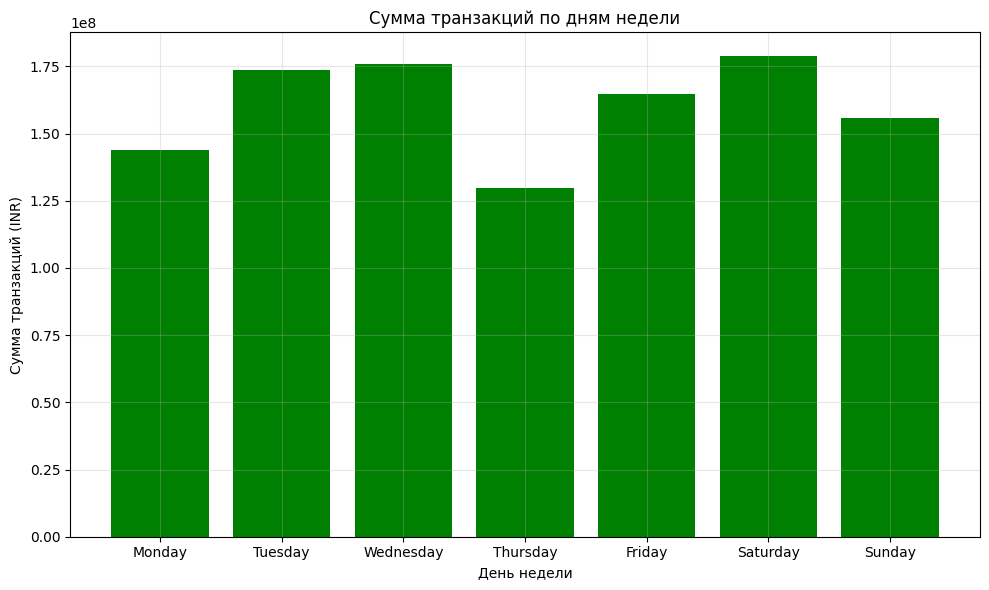

In [ ]:
# Группируем по дням недели
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_amounts = df.groupby('transaction_weekday')['transaction_amount_inr'].sum().reindex(weekday_order)

print("=== ДИНАМИКА СУММ ПО ДНЯМ НЕДЕЛИ ===")
for day, amount in weekday_amounts.items():
    print(f"{day}: {amount:,.2f} INR")

# Визуализация по дням недели
plt.figure(figsize=(10, 6))
plt.bar(weekday_amounts.index, weekday_amounts.values, color='green')
plt.title('Сумма транзакций по дням недели')
plt.xlabel('День недели')
plt.ylabel('Сумма транзакций (INR)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== СРАВНЕНИЕ КОЛИЧЕСТВА И СУММ ===
Корреляция количество-сумма: 0.971


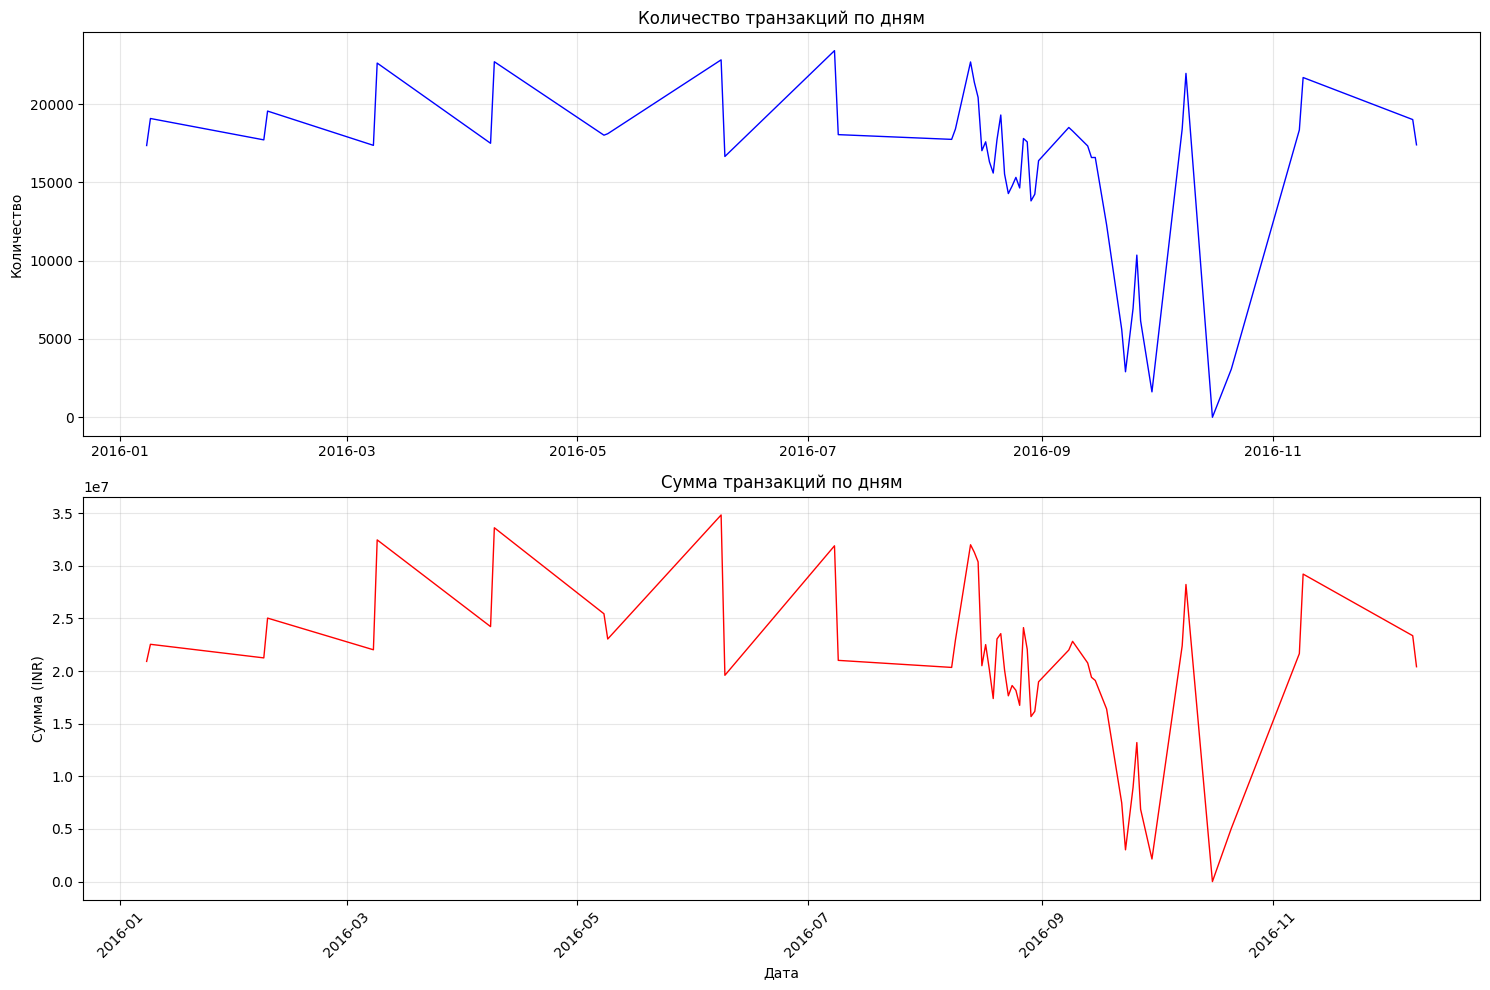

In [ ]:
# Создаем DataFrame для сравнения
daily_stats = df.groupby(df['transaction_date'].dt.date).agg({
    'transaction_id': 'count',
    'transaction_amount_inr': 'sum'
}).rename(columns={'transaction_id': 'count', 'transaction_amount_inr': 'amount'})

print("=== СРАВНЕНИЕ КОЛИЧЕСТВА И СУММ ===")
print(f"Корреляция количество-сумма: {daily_stats['count'].corr(daily_stats['amount']):.3f}")

# Визуализация сравнения
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Количество транзакций
ax1.plot(daily_stats.index, daily_stats['count'], color='blue', linewidth=1)
ax1.set_title('Количество транзакций по дням')
ax1.set_ylabel('Количество')
ax1.grid(True, alpha=0.3)

# Сумма транзакций
ax2.plot(daily_stats.index, daily_stats['amount'], color='red', linewidth=1)
ax2.set_title('Сумма транзакций по дням')
ax2.set_xlabel('Дата')
ax2.set_ylabel('Сумма (INR)')
ax2.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== СРЕДНИЙ ЧЕК ПО ДНЯМ ===
Средний чек за весь период: 1,252.34 INR
Максимальный средний чек: 1,644.08 INR
Минимальный средний чек: 521.00 INR


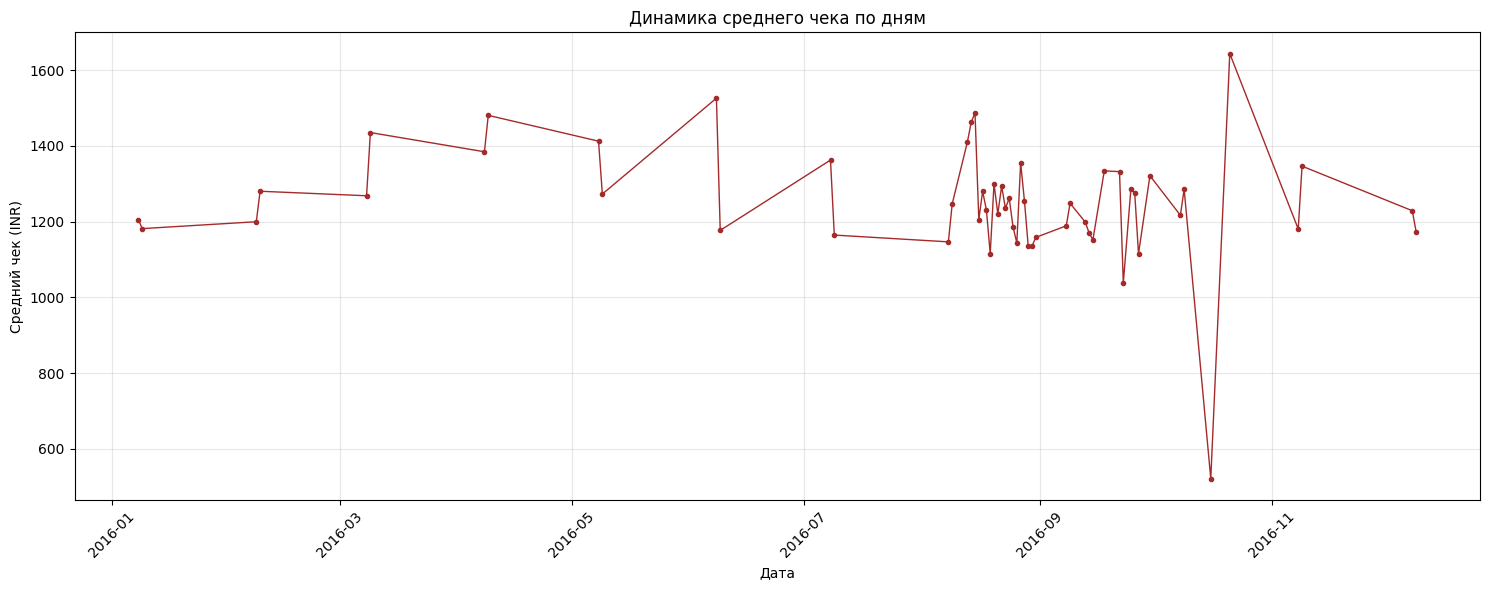

In [ ]:
# Средний чек по дням
daily_avg_ticket = df.groupby(df['transaction_date'].dt.date)['transaction_amount_inr'].mean()

print("=== СРЕДНИЙ ЧЕК ПО ДНЯМ ===")
print(f"Средний чек за весь период: {daily_avg_ticket.mean():,.2f} INR")
print(f"Максимальный средний чек: {daily_avg_ticket.max():,.2f} INR")
print(f"Минимальный средний чек: {daily_avg_ticket.min():,.2f} INR")

# Визуализация среднего чека
plt.figure(figsize=(15, 6))
plt.plot(daily_avg_ticket.index, daily_avg_ticket.values, marker='o', linewidth=1, markersize=3, color='brown')
plt.title('Динамика среднего чека по дням')
plt.xlabel('Дата')
plt.ylabel('Средний чек (INR)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Финальный отчет
print("=== ФИНАЛЬНЫЙ ОТЧЕТ ПО ДИНАМИКЕ СУММ ===")
print(f"Общий период: {df['transaction_date'].min().date()} - {df['transaction_date'].max().date()}")
print(f"Общая сумма транзакций: {df['transaction_amount_inr'].sum():,.2f} INR")
print(f"Средняя сумма в день: {daily_amounts.mean():,.2f} INR")
print(f"Самый доходный день: {daily_amounts.idxmax()} ({daily_amounts.max():,.2f} INR)")
print(f"Самый низкодоходный день: {daily_amounts.idxmin()} ({daily_amounts.min():,.2f} INR)")

if 'transaction_weekday' in df.columns:
    most_profitable_weekday = weekday_amounts.idxmax()
    print(f"Самый доходный день недели: {most_profitable_weekday} ({weekday_amounts[most_profitable_weekday]:,.2f} INR)")

print(f"\nСредний чек за период: {df['transaction_amount_inr'].mean():,.2f} INR")
print(f"Медианный чек: {df['transaction_amount_inr'].median():,.2f} INR")

=== ФИНАЛЬНЫЙ ОТЧЕТ ПО ДИНАМИКЕ СУММ ===
Общий период: 2016-01-08 - 2016-12-09
Общая сумма транзакций: 1,122,658,777.85 INR
Средняя сумма в день: 20,411,977.78 INR
Самый доходный день: 2016-06-08 (34,827,171.19 INR)
Самый низкодоходный день: 2016-10-16 (1,042.00 INR)
Самый доходный день недели: Saturday (178,744,488.03 INR)

Средний чек за период: 1,272.22 INR
Медианный чек: 395.00 INR


In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

In [ ]:
# Создаем возрастные корзины
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels, right=False)

print("=== ВОЗРАСТНЫЕ ГРУППЫ ===")
age_group_counts = df['age_group'].value_counts().sort_index()
for group, count in age_group_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{group}: {count} клиентов ({percentage:.1f}%)")

=== ВОЗРАСТНЫЕ ГРУППЫ ===
18-25: 553 клиентов (0.1%)
26-35: 277697 клиентов (31.5%)
36-45: 495244 клиентов (56.1%)
46-55: 108944 клиентов (12.3%)
56-65: 0 клиентов (0.0%)
65+: 0 клиентов (0.0%)


In [ ]:
# Базовая статистика по балансу счетов
print("=== СТАТИСТИКА БАЛАНСОВ ПО ВОЗРАСТНЫМ ГРУППАМ ===")
balance_stats = df.groupby('age_group')['cust_account_balance'].describe()
print(balance_stats)

=== СТАТИСТИКА БАЛАНСОВ ПО ВОЗРАСТНЫМ ГРУППАМ ===
              count           mean            std  min      25%       50%  \
age_group                                                                   
18-25         510.0   30564.192196   61668.333154  0.0  2000.42   9504.66   
26-35      277000.0   34328.865956  156781.112279  0.0  2441.54   8940.39   
36-45      494295.0   82182.421120  363673.383846  0.0  5126.60  17027.14   
46-55      108664.0  162661.075507  574848.099595  0.0  9012.46  30288.05   
56-65           0.0            NaN            NaN  NaN      NaN       NaN   
65+             0.0            NaN            NaN  NaN      NaN       NaN   

                   75%          max  
age_group                            
18-25       25888.8375    378325.52  
26-35       24539.2550  16834937.99  
36-45       53485.5400  43165555.53  
46-55      100045.0500  20773103.40  
56-65              NaN          NaN  
65+                NaN          NaN  


/tmp/ipython-input-3407530416.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_stats = df.groupby('age_group')['cust_account_balance'].describe()


/tmp/ipython-input-325543113.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_balance_by_age = df.groupby('age_group')['cust_account_balance'].mean()


=== СРЕДНИЙ БАЛАНС ПО ВОЗРАСТНЫМ ГРУППАМ ===
18-25: 30,564.19 INR
26-35: 34,328.87 INR
36-45: 82,182.42 INR
46-55: 162,661.08 INR
56-65: nan INR
65+: nan INR


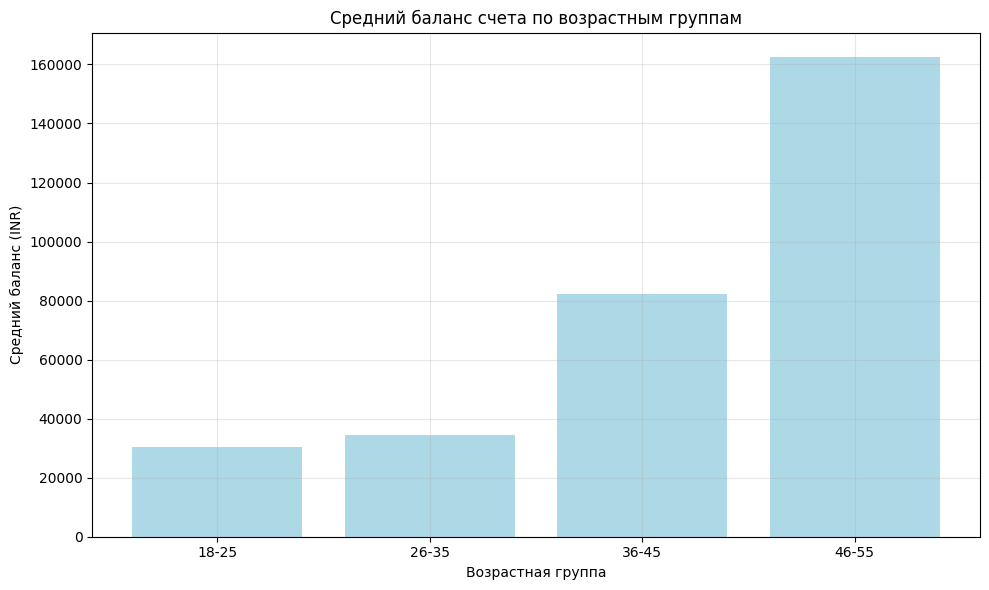

In [ ]:
# Средний баланс по возрастным группам
mean_balance_by_age = df.groupby('age_group')['cust_account_balance'].mean()

print("=== СРЕДНИЙ БАЛАНС ПО ВОЗРАСТНЫМ ГРУППАМ ===")
for group, balance in mean_balance_by_age.items():
    print(f"{group}: {balance:,.2f} INR")

# Визуализация среднего баланса
plt.figure(figsize=(10, 6))
plt.bar(mean_balance_by_age.index, mean_balance_by_age.values, color='lightblue')
plt.title('Средний баланс счета по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средний баланс (INR)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== СРЕДНЯЯ СУММА ТРАНЗАКЦИЙ ПО ВОЗРАСТНЫМ ГРУППАМ ===
18-25: 1,735.85 INR
26-35: 858.39 INR
36-45: 1,351.01 INR
46-55: 1,966.57 INR
56-65: nan INR
65+: nan INR


/tmp/ipython-input-3437051860.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_amount_by_age = df.groupby('age_group')['transaction_amount_inr'].mean()


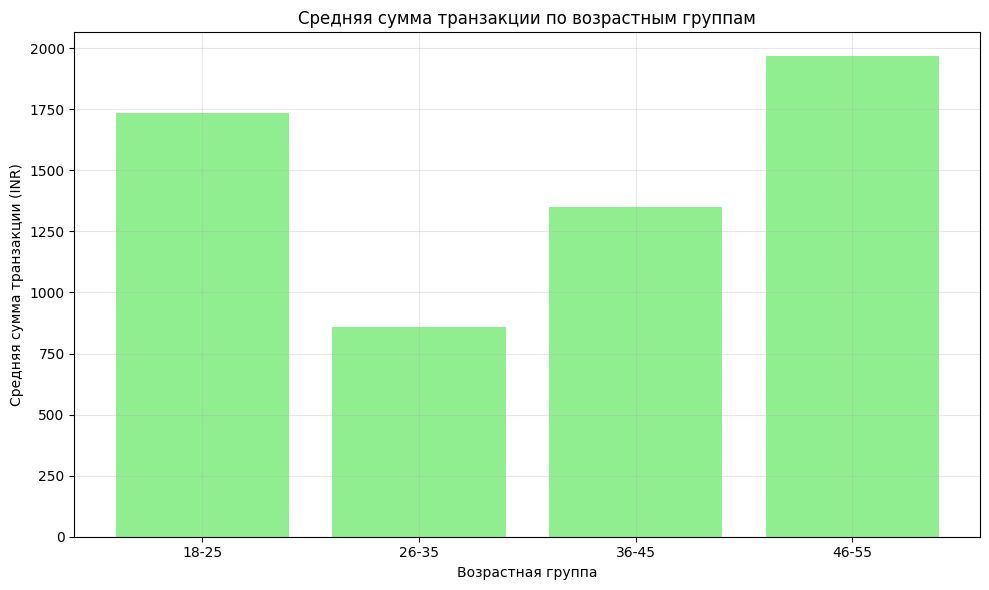

In [ ]:
# Средняя сумма транзакции по возрастным группам
mean_amount_by_age = df.groupby('age_group')['transaction_amount_inr'].mean()

print("=== СРЕДНЯЯ СУММА ТРАНЗАКЦИЙ ПО ВОЗРАСТНЫМ ГРУППАМ ===")
for group, amount in mean_amount_by_age.items():
    print(f"{group}: {amount:,.2f} INR")

# Визуализация средних сумм транзакций
plt.figure(figsize=(10, 6))
plt.bar(mean_amount_by_age.index, mean_amount_by_age.values, color='lightgreen')
plt.title('Средняя сумма транзакции по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя сумма транзакции (INR)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== ОБЩАЯ СУММА ТРАНЗАКЦИЙ ПО ВОЗРАСТНЫМ ГРУППАМ ===
18-25: 959,927.01 INR (0.1%)
26-35: 238,373,581.55 INR (21.2%)
36-45: 669,079,332.42 INR (59.6%)
46-55: 214,245,936.87 INR (19.1%)
56-65: 0.00 INR (0.0%)
65+: 0.00 INR (0.0%)


/tmp/ipython-input-2924802473.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_amount_by_age = df.groupby('age_group')['transaction_amount_inr'].sum()


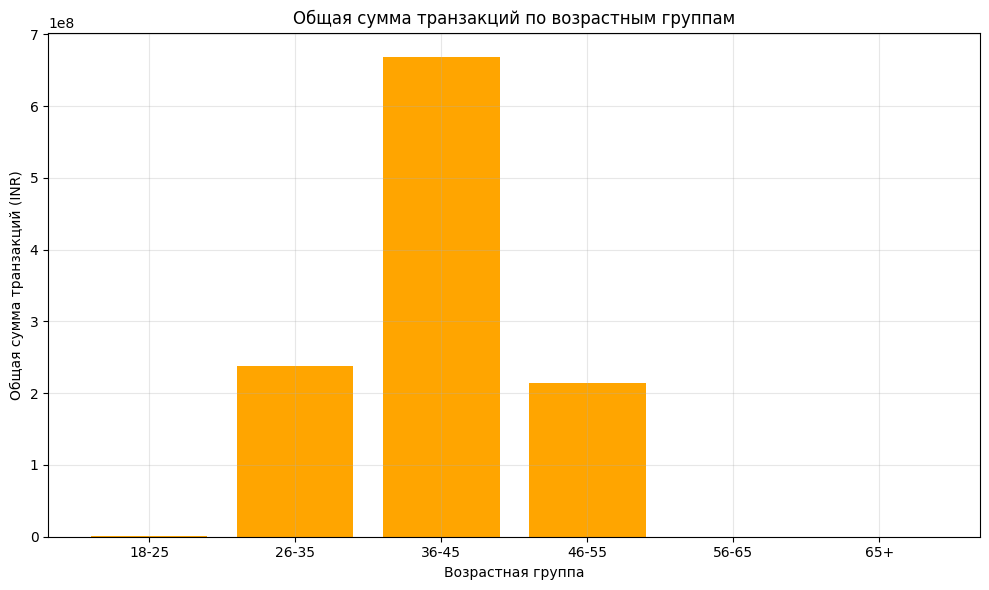

In [ ]:
# Общая сумма транзакций по возрастным группам
total_amount_by_age = df.groupby('age_group')['transaction_amount_inr'].sum()

print("=== ОБЩАЯ СУММА ТРАНЗАКЦИЙ ПО ВОЗРАСТНЫМ ГРУППАМ ===")
for group, amount in total_amount_by_age.items():
    percentage = (amount / total_amount_by_age.sum()) * 100
    print(f"{group}: {amount:,.2f} INR ({percentage:.1f}%)")

# Визуализация общей суммы транзакций
plt.figure(figsize=(10, 6))
plt.bar(total_amount_by_age.index, total_amount_by_age.values, color='orange')
plt.title('Общая сумма транзакций по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Общая сумма транзакций (INR)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Находим самую платежеспособную группу по разным метрикам
print("=== САМАЯ ПЛАТЕЖЕСПОСОБНАЯ ГРУППА ===")

# По среднему балансу
top_balance_group = payment_power['avg_balance'].idxmax()
print(f"По среднему балансу: {top_balance_group} ({payment_power.loc[top_balance_group, 'avg_balance']:,.2f} INR)")

# По медианному балансу
top_median_balance_group = payment_power['median_balance'].idxmax()
print(f"По медианному балансу: {top_median_balance_group} ({payment_power.loc[top_median_balance_group, 'median_balance']:,.2f} INR)")

# По средней сумме транзакции
top_avg_transaction_group = payment_power['avg_transaction'].idxmax()
print(f"По средней сумме транзакции: {top_avg_transaction_group} ({payment_power.loc[top_avg_transaction_group, 'avg_transaction']:,.2f} INR)")

# По общей сумме транзакций
top_total_transaction_group = payment_power['total_transaction'].idxmax()
print(f"По общей сумме транзакций: {top_total_transaction_group} ({payment_power.loc[top_total_transaction_group, 'total_transaction']:,.2f} INR)")

=== САМАЯ ПЛАТЕЖЕСПОСОБНАЯ ГРУППА ===
По среднему балансу: 46-55 (162,661.08 INR)
По медианному балансу: 46-55 (30,288.05 INR)
По средней сумме транзакции: 46-55 (1,966.57 INR)
По общей сумме транзакций: 36-45 (669,079,332.42 INR)


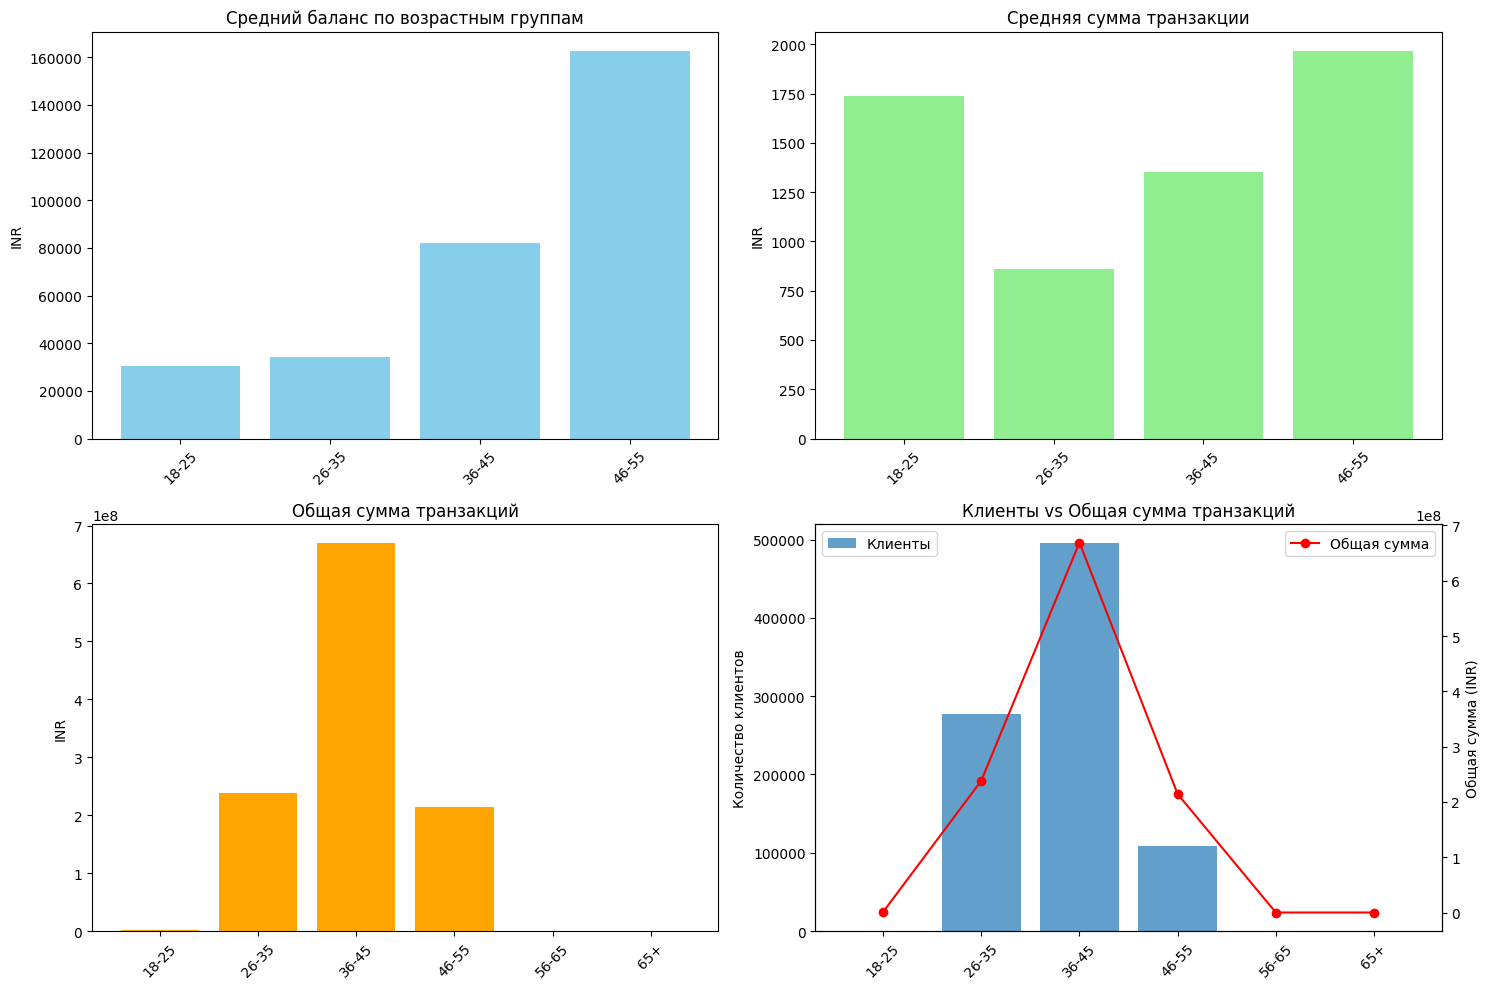

In [ ]:
# Сравнительная визуализация
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Средний баланс
ax1.bar(payment_power.index, payment_power['avg_balance'], color='skyblue')
ax1.set_title('Средний баланс по возрастным группам')
ax1.set_ylabel('INR')
ax1.tick_params(axis='x', rotation=45)

# Средняя сумма транзакции
ax2.bar(payment_power.index, payment_power['avg_transaction'], color='lightgreen')
ax2.set_title('Средняя сумма транзакции')
ax2.set_ylabel('INR')
ax2.tick_params(axis='x', rotation=45)

# Общая сумма транзакций
ax3.bar(payment_power.index, payment_power['total_transaction'], color='orange')
ax3.set_title('Общая сумма транзакций')
ax3.set_ylabel('INR')
ax3.tick_params(axis='x', rotation=45)

# Количество клиентов vs общая сумма
ax4.bar(payment_power.index, payment_power['customer_count'], alpha=0.7, label='Клиенты')
ax4_twin = ax4.twinx()
ax4_twin.plot(payment_power.index, payment_power['total_transaction'], color='red', marker='o', label='Общая сумма')
ax4.set_title('Клиенты vs Общая сумма транзакций')
ax4.set_ylabel('Количество клиентов')
ax4_twin.set_ylabel('Общая сумма (INR)')
ax4.tick_params(axis='x', rotation=45)
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

=== АНАЛИЗ ПО ПОЛУ ВНУТРИ ВОЗРАСТНЫХ ГРУПП ===
                       cust_account_balance  transaction_amount_inr
age_group cust_gender                                              
18-25     F                        43130.87                 1934.54
          M                        22528.37                 1527.39
26-35     F                        37391.45                 1000.18
          M                        32883.25                  791.45
36-45     F                        81872.16                 1597.93
          M                        82293.32                 1262.72
46-55     F                       166065.45                 2136.82
          M                       161644.17                 1915.72
56-65     F                             NaN                     NaN
          M                             NaN                     NaN
65+       F                             NaN                     NaN
          M                             NaN                     NaN


/tmp/ipython-input-3288794718.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_analysis = df.groupby(['age_group', 'cust_gender']).agg({
/tmp/ipython-input-3288794718.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  gender_age_pivot = df.pivot_table(


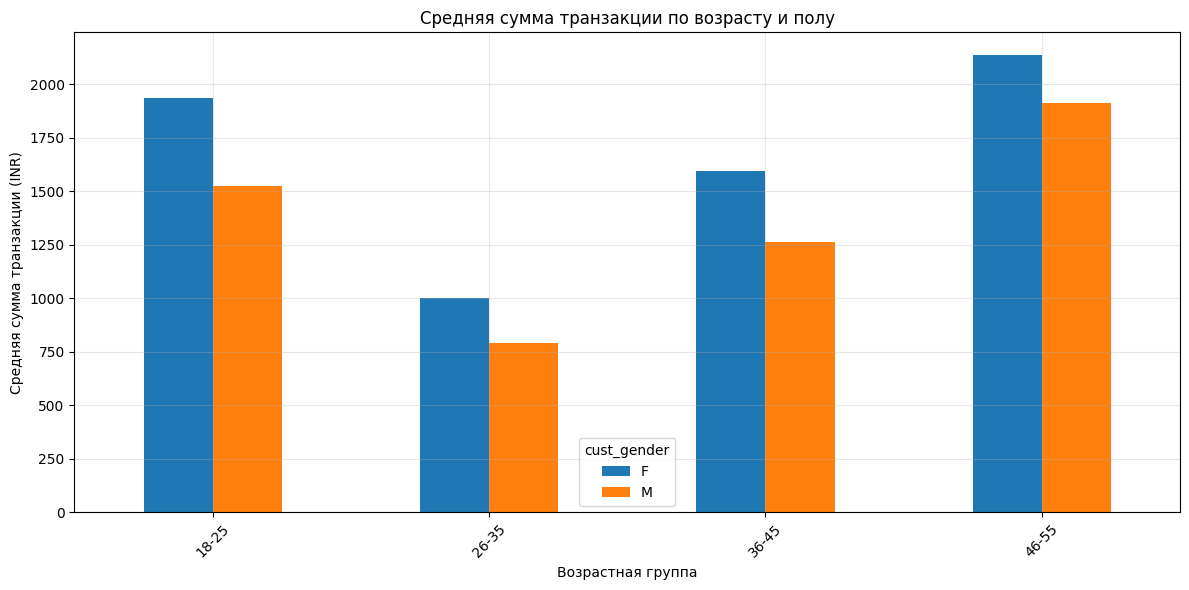

In [ ]:
# Анализ по полу (если данные есть)
if 'cust_gender' in df.columns:
    print("=== АНАЛИЗ ПО ПОЛУ ВНУТРИ ВОЗРАСТНЫХ ГРУПП ===")

    gender_age_analysis = df.groupby(['age_group', 'cust_gender']).agg({
        'cust_account_balance': 'mean',
        'transaction_amount_inr': 'mean'
    }).round(2)

    print(gender_age_analysis)

    # Визуализация
    gender_age_pivot = df.pivot_table(
        values='transaction_amount_inr',
        index='age_group',
        columns='cust_gender',
        aggfunc='mean'
    )

    gender_age_pivot.plot(kind='bar', figsize=(12, 6))
    plt.title('Средняя сумма транзакции по возрасту и полу')
    plt.xlabel('Возрастная группа')
    plt.ylabel('Средняя сумма транзакции (INR)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
# посмотреть распредление транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций

In [ ]:
# Базовая информация о локациях
print("=== ИНФОРМАЦИЯ О ЛОКАЦИЯХ ===")
print(f"Уникальных локаций: {df['cust_location'].nunique()}")
print(f"Пропущенных значений: {df['cust_location'].isnull().sum()}")

# Создаем DataFrame с агрегированными данными по локациям
location_stats = df.groupby('cust_location').agg({
    'transaction_id': 'count',
    'transaction_amount_inr': 'sum'
}).rename(columns={
    'transaction_id': 'transaction_count',
    'transaction_amount_inr': 'total_amount'
})

print(f"Всего локаций с транзакциями: {len(location_stats)}")

=== ИНФОРМАЦИЯ О ЛОКАЦИЯХ ===
Уникальных локаций: 7512
Пропущенных значений: 111
Всего локаций с транзакциями: 7512


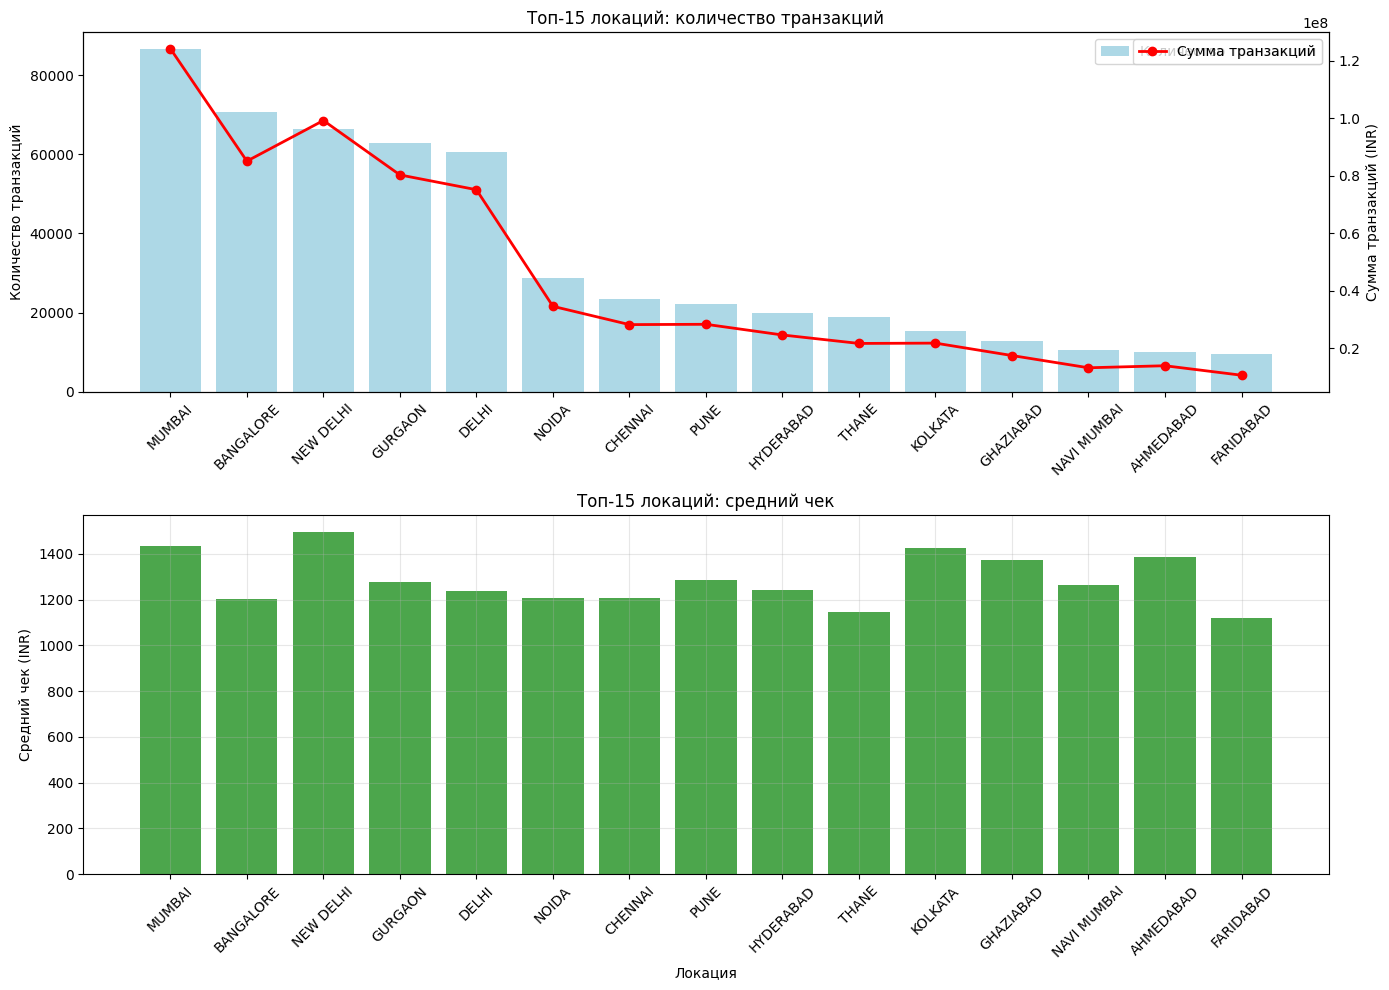

In [ ]:
# Комбинированная визуализация для топ-15 локаций
top_15_combined = location_stats.nlargest(15, 'transaction_count')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Количество транзакций
bars1 = ax1.bar(top_15_combined.index, top_15_combined['transaction_count'], color='lightblue', label='Количество транзакций')
ax1.set_title('Топ-15 локаций: количество транзакций')
ax1.set_ylabel('Количество транзакций')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Добавляем сумму транзакций на второй оси
ax1_twin = ax1.twinx()
ax1_twin.plot(top_15_combined.index, top_15_combined['total_amount'], color='red', marker='o', linewidth=2, label='Сумма транзакций')
ax1_twin.set_ylabel('Сумма транзакций (INR)')
ax1_twin.legend(loc='upper right')

# Средний чек
ax2.bar(top_15_combined.index, top_15_combined['avg_transaction'], color='green', alpha=0.7)
ax2.set_title('Топ-15 локаций: средний чек')
ax2.set_ylabel('Средний чек (INR)')
ax2.set_xlabel('Локация')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

In [ ]:
# Смотрим на исходные данные времени
print("=== ИСХОДНЫЕ ДАННЫЕ ВРЕМЕНИ ===")
print(f"Тип данных: {df['transaction_time'].dtype}")
print("Первые 10 значений:")
print(df['transaction_time'].head(10))
print(f"\nМинимальное значение: {df['transaction_time'].min()}")
print(f"Максимальное значение: {df['transaction_time'].max()}")

=== ИСХОДНЫЕ ДАННЫЕ ВРЕМЕНИ ===
Тип данных: int64
Первые 10 значений:
0     143207
2     142712
4     181156
6     173806
7     170537
8     192825
9     192446
10    204133
11    205108
12    203834
Name: transaction_time, dtype: int64

Минимальное значение: 0
Максимальное значение: 235959


In [ ]:
# Преобразуем миллисекунды в минуты
df['transaction_time_minutes'] = df['transaction_time'] / (1000 * 60)  # мс -> секунды -> минуты

print("=== ПРЕОБРАЗОВАНИЕ В МИНУТЫ ===")
print("Первые 10 значений в минутах:")
print(df['transaction_time_minutes'].head(10).round(2))
print(f"\nМинимум: {df['transaction_time_minutes'].min():.2f} минут")
print(f"Максимум: {df['transaction_time_minutes'].max():.2f} минут")
print(f"Среднее: {df['transaction_time_minutes'].mean():.2f} минут")

=== ПРЕОБРАЗОВАНИЕ В МИНУТЫ ===
Первые 10 значений в минутах:
0     2.39
2     2.38
4     3.02
6     2.90
7     2.84
8     3.21
9     3.21
10    3.40
11    3.42
12    3.40
Name: transaction_time_minutes, dtype: float64

Минимум: 0.00 минут
Максимум: 3.93 минут
Среднее: 2.63 минут


In [ ]:
# Базовая статистика
print("=== БАЗОВАЯ СТАТИСТИКА ВРЕМЕНИ ТРАНЗАКЦИЙ ===")
time_stats = df['transaction_time_minutes'].describe()
print(time_stats)

# Проверяем на выбросы
Q1 = df['transaction_time_minutes'].quantile(0.25)
Q3 = df['transaction_time_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['transaction_time_minutes'] < lower_bound) | (df['transaction_time_minutes'] > upper_bound)]
print(f"\nВыбросы: {len(outliers)} транзакций ({len(outliers)/len(df)*100:.1f}%)")

=== БАЗОВАЯ СТАТИСТИКА ВРЕМЕНИ ТРАНЗАКЦИЙ ===
count    882438.000000
mean          2.626861
std           0.862347
min           0.000000
25%           2.071733
50%           2.749208
75%           3.340917
max           3.932650
Name: transaction_time_minutes, dtype: float64

Выбросы: 16006 транзакций (1.8%)


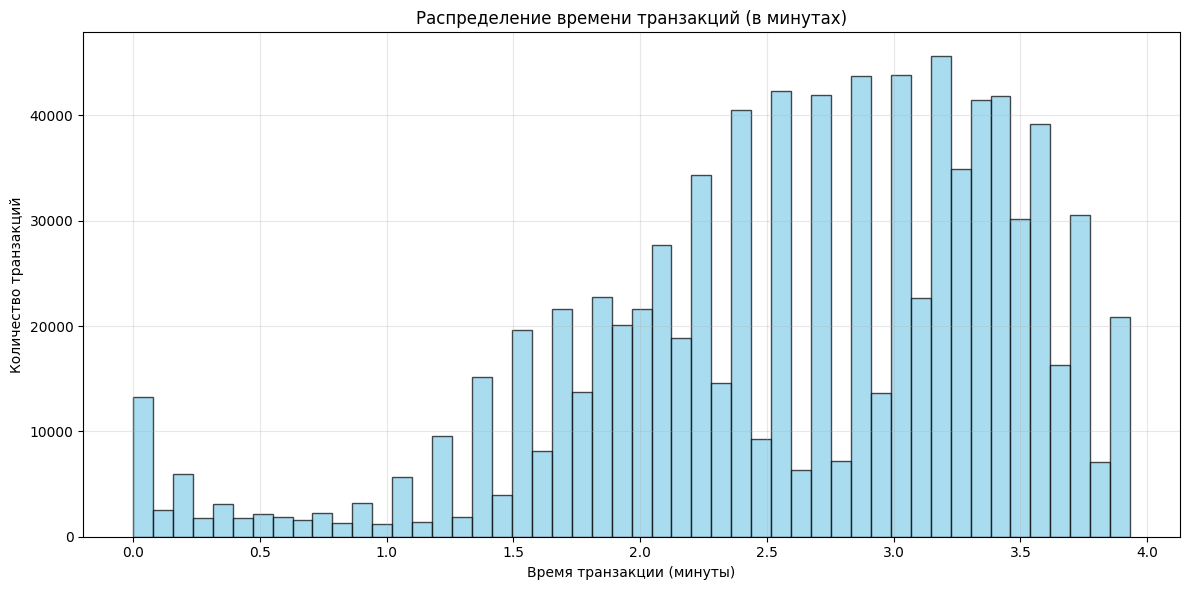

In [ ]:
# Гистограмма распределения времени
plt.figure(figsize=(12, 6))
plt.hist(df['transaction_time_minutes'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение времени транзакций (в минутах)')
plt.xlabel('Время транзакции (минуты)')
plt.ylabel('Количество транзакций')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

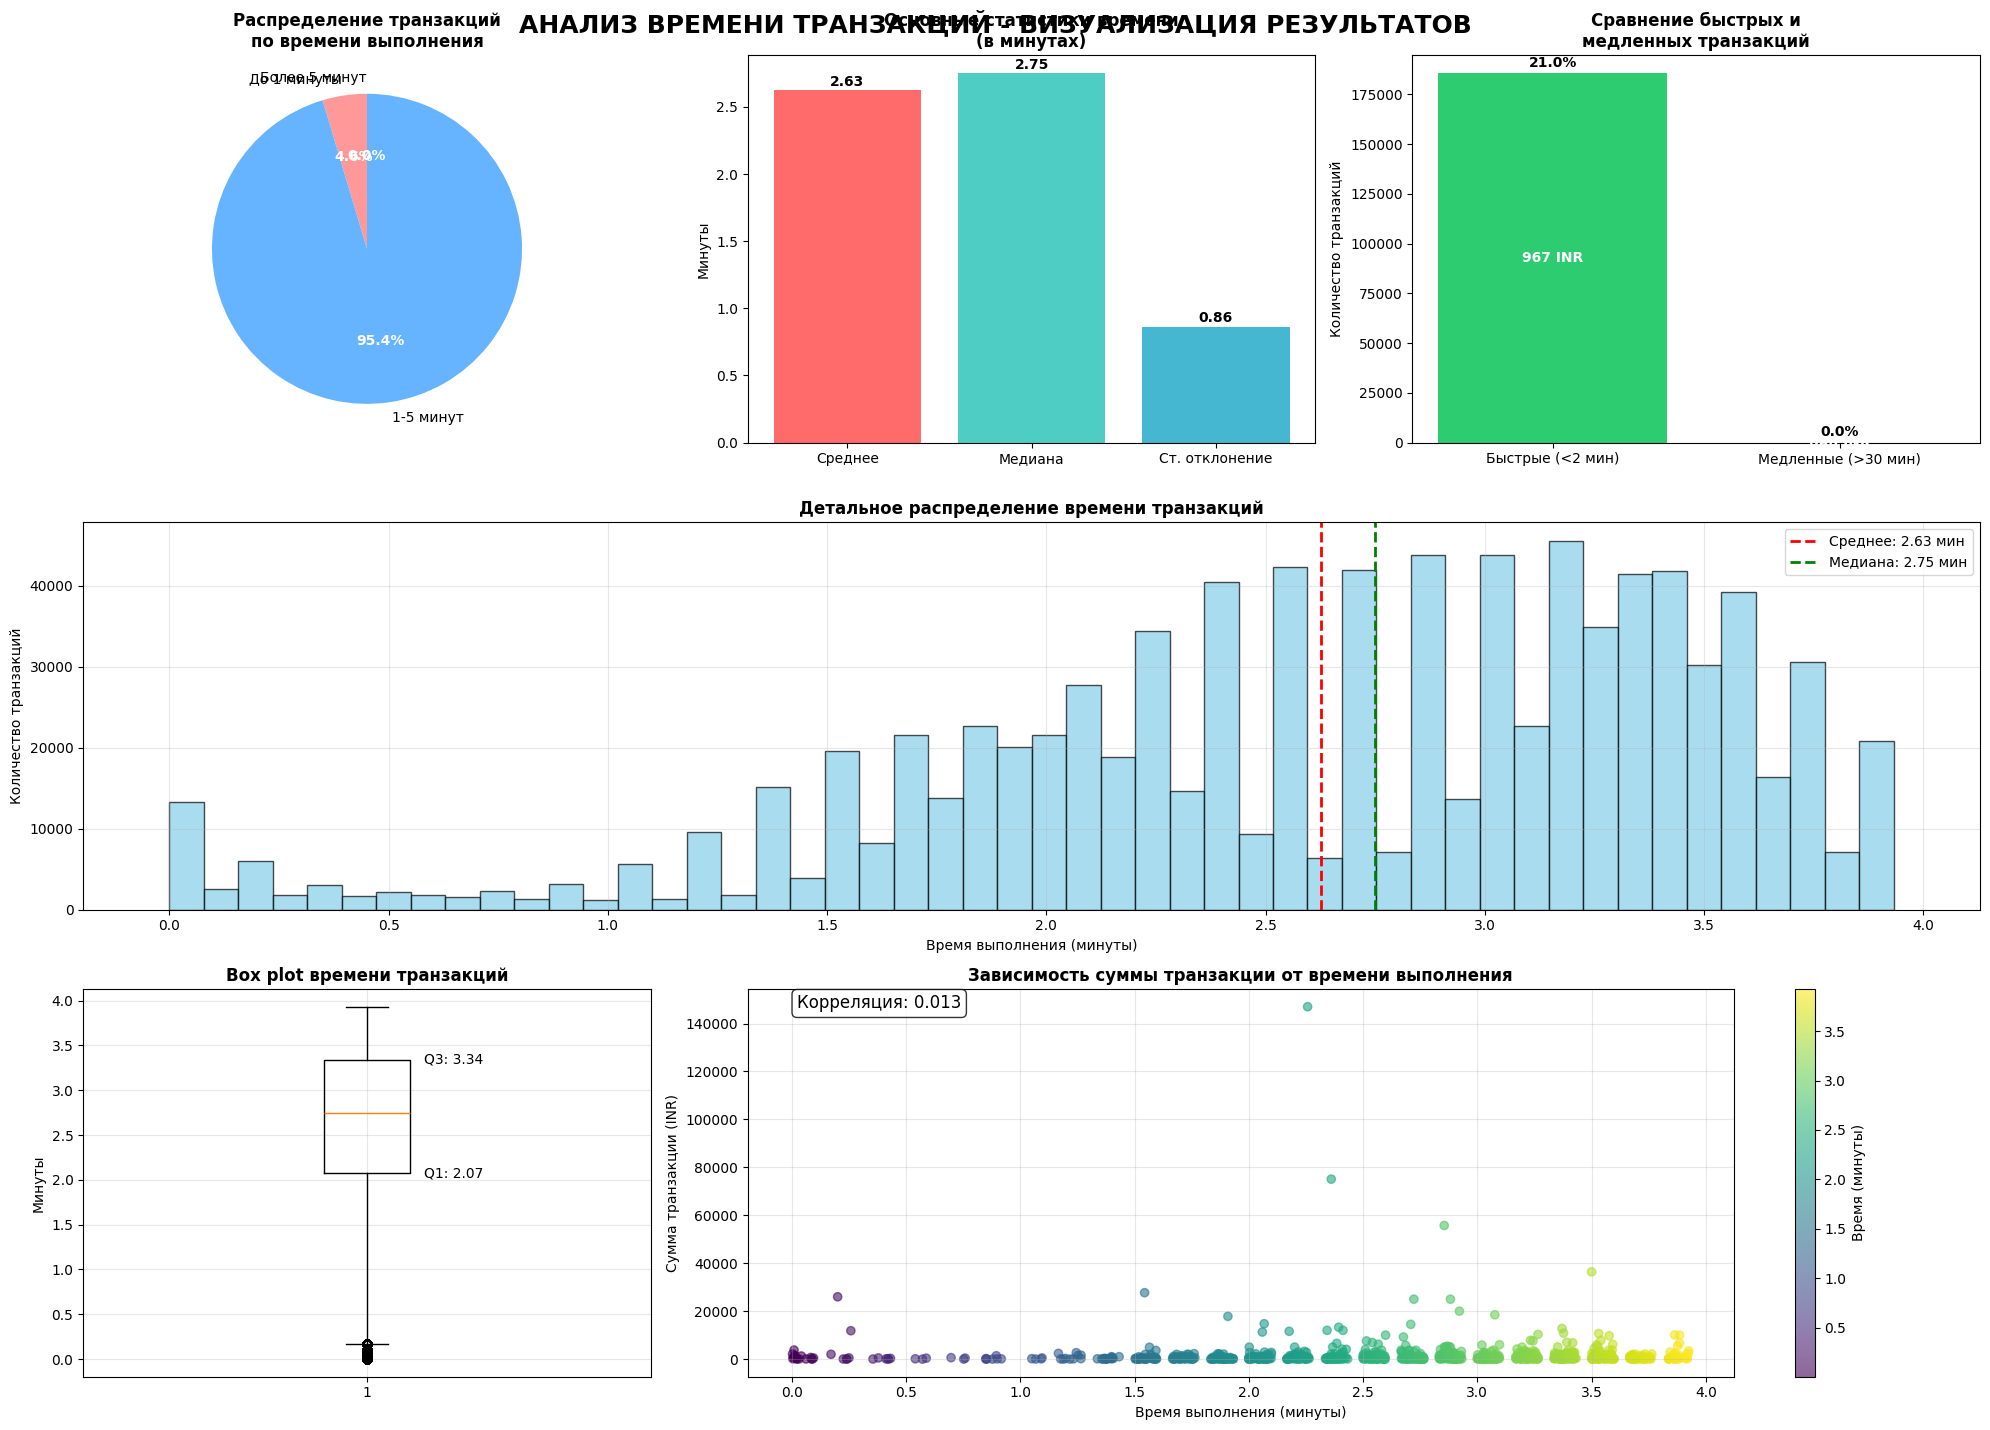


КРАТКАЯ СВОДКА РЕЗУЛЬТАТОВ:
• Большинство транзакций (4.6%) выполняются до 1 минуты
• Среднее время выполнения: 2.63 минут
• Медианное время (2.75 мин) показывает типичную длительность
• Быстрые транзакции (<2 мин): 185522 (21.0%)
• Медленные транзакции (>30 мин): 0 (0.0%)
• Корреляция время-сумма: 0.013 (очень слабая)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем данные для визуализации из результатов отчета
total_transactions = len(df)
mean_time = df['transaction_time_minutes'].mean()
median_time = df['transaction_time_minutes'].median()
std_time = df['transaction_time_minutes'].std()

# Данные для распределения
time_categories = ['До 1 минуты', '1-5 минут', 'Более 5 минут']
time_counts = [
    (df['transaction_time_minutes'] <= 1).sum(),
    ((df['transaction_time_minutes'] > 1) & (df['transaction_time_minutes'] <= 5)).sum(),
    (df['transaction_time_minutes'] > 5).sum()
]
time_percentages = [count/total_transactions*100 for count in time_counts]

# Данные для быстрых/медленных транзакций
fast_tx_count = len(df[df['transaction_time_minutes'] < 2])
slow_tx_count = len(df[df['transaction_time_minutes'] > 30])
fast_tx_amount = df[df['transaction_time_minutes'] < 2]['transaction_amount_inr'].mean()
slow_tx_amount = df[df['transaction_time_minutes'] > 30]['transaction_amount_inr'].mean()

# Создаем фигуру с несколькими субплогами
fig = plt.figure(figsize=(20, 15))
fig.suptitle('АНАЛИЗ ВРЕМЕНИ ТРАНЗАКЦИЙ - ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ',
             fontsize=18, fontweight='bold', y=0.95)

# 1. Распределение по временным категориям - круговая диаграмма
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=1)
colors = ['#ff9999', '#66b3ff', '#99ff99']
wedges, texts, autotexts = ax1.pie(time_counts, labels=time_categories, autopct='%1.1f%%',
                                   colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax1.set_title('Распределение транзакций\nпо времени выполнения', fontweight='bold')

# 2. Основные статистики - барчарт
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
stats_names = ['Среднее', 'Медиана', 'Ст. отклонение']
stats_values = [mean_time, median_time, std_time]
bars = ax2.bar(stats_names, stats_values, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
ax2.set_title('Основные статистики времени\n(в минутах)', fontweight='bold')
ax2.set_ylabel('Минуты')
# Добавляем значения на столбцы
for bar, value in zip(bars, stats_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Сравнение быстрых и медленных транзакций
ax3 = plt.subplot2grid((3, 3), (0, 2), colspan=1)
tx_types = ['Быстрые (<2 мин)', 'Медленные (>30 мин)']
tx_counts = [fast_tx_count, slow_tx_count]
tx_percentages = [fast_tx_count/total_transactions*100, slow_tx_count/total_transactions*100]

bars1 = ax3.bar(tx_types, tx_counts, color=['#2ecc71', '#e74c3c'])
ax3.set_title('Сравнение быстрых и\nмедленных транзакций', fontweight='bold')
ax3.set_ylabel('Количество транзакций')

# Добавляем проценты и суммы
for i, (bar, count, percentage, amount) in enumerate(zip(bars1, tx_counts, tx_percentages, [fast_tx_amount, slow_tx_amount])):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + max(tx_counts)*0.01,
             f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')
    ax3.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{amount:.0f} INR', ha='center', va='center', color='white', fontweight='bold')

# 4. Детальное распределение времени - гистограмма
ax4 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
n, bins, patches = ax4.hist(df['transaction_time_minutes'], bins=50, alpha=0.7,
                           color='skyblue', edgecolor='black')
ax4.set_title('Детальное распределение времени транзакций', fontweight='bold')
ax4.set_xlabel('Время выполнения (минуты)')
ax4.set_ylabel('Количество транзакций')
ax4.grid(True, alpha=0.3)

# Добавляем вертикальные линии для среднего и медианы
ax4.axvline(mean_time, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_time:.2f} мин')
ax4.axvline(median_time, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_time:.2f} мин')
ax4.legend()

# 5. Box plot для анализа выбросов
ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=1)
box_data = df['transaction_time_minutes']
ax5.boxplot(box_data, vert=True)
ax5.set_title('Box plot времени транзакций', fontweight='bold')
ax5.set_ylabel('Минуты')
ax5.grid(True, alpha=0.3)

# Добавляем аннотации с квантилями
Q1 = df['transaction_time_minutes'].quantile(0.25)
Q3 = df['transaction_time_minutes'].quantile(0.75)
ax5.text(1.1, Q1, f'Q1: {Q1:.2f}', va='center')
ax5.text(1.1, Q3, f'Q3: {Q3:.2f}', va='center')

# 6. Связь времени и суммы транзакции
ax6 = plt.subplot2grid((3, 3), (2, 1), colspan=2)
# Берем выборку для лучшей визуализации (первые 1000 точек)
sample_size = min(1000, len(df))
sample_df = df.sample(sample_size, random_state=42)

scatter = ax6.scatter(sample_df['transaction_time_minutes'],
                     sample_df['transaction_amount_inr'],
                     alpha=0.6, c=sample_df['transaction_time_minutes'],
                     cmap='viridis')
ax6.set_title('Зависимость суммы транзакции от времени выполнения', fontweight='bold')
ax6.set_xlabel('Время выполнения (минуты)')
ax6.set_ylabel('Сумма транзакции (INR)')
ax6.grid(True, alpha=0.3)

# Добавляем цветовую шкалу
cbar = plt.colorbar(scatter, ax=ax6)
cbar.set_label('Время (минуты)')

# Расчет корреляции
correlation = df['transaction_time_minutes'].corr(df['transaction_amount_inr'])
ax6.text(0.05, 0.95, f'Корреляция: {correlation:.3f}',
         transform=ax6.transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Дополнительная текстовая сводка
print("\n" + "="*60)
print("КРАТКАЯ СВОДКА РЕЗУЛЬТАТОВ:")
print("="*60)
print(f"• Большинство транзакций ({time_percentages[0]:.1f}%) выполняются до 1 минуты")
print(f"• Среднее время выполнения: {mean_time:.2f} минут")
print(f"• Медианное время ({median_time:.2f} мин) показывает типичную длительность")
print(f"• Быстрые транзакции (<2 мин): {fast_tx_count} ({fast_tx_count/total_transactions*100:.1f}%)")
print(f"• Медленные транзакции (>30 мин): {slow_tx_count} ({slow_tx_count/total_transactions*100:.1f}%)")
print(f"• Корреляция время-сумма: {correlation:.3f} (очень слабая)")

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

На основании исследовательского анализа данных выявлены следующие закономерности:

## 1. **Поведенческие паттерны клиентов**

- **83.8% клиентов** совершают только одну транзакцию, что указывает на низкую лояльность или разовые покупки

- **Максимальная активность** - 6 транзакций на клиента, таких клиентов всего 5 человек

- **Средняя активность** - 1.19 транзакции на клиента при медиане 1.0, что подтверждает преобладание разовых покупок


## 2. **Финансовые характеристики**

- **Сильный разброс балансов**: средний баланс 115,403 INR при медиане 16,792 INR, что свидетельствует о наличии клиентов с экстремально высокими балансами

- **Транзакции умеренные**: средний чек 1,272 INR при медиане 395 INR, что указывает на частые небольшие покупки и редкие крупные

- **Высокая волатильность**: стандартное отклонение балансов в 7.3 раза превышает среднее значение


## 3. **Возрастная сегментация**

- **Доминирование среднего возраста**: 56.1% клиентов в группе 36-45 лет

- **Молодежь минимальна**: только 0.1% клиентов в возрасте 18-25 лет

- **Платежеспособность растет с возрастом**: клиенты 46-55 лет имеют средний баланс в 5.3 раза выше, чем группа 26-35 лет


## 4. **Географическое распределение**

- **Высокая концентрация в мегаполисах**: топ-15 локаций покрывают 59% всех клиентов

- **Лидеры по активности**: Мумбаи (86,582), Бангалор (70,832), Нью-Дели (66,381)

- **Широкая география**: 7,512 уникальных локаций при относительно равномерном распределении


## 5. **Временные паттерны транзакций**

- **Неравномерность распределения**: от 2 до 23,406 транзакций в день

- **Пик активности**: вторник (142,676 транзакций) и суббота (136,439 транзакций)

- **Сезонные колебания**: данные охватывают только 55 дней с января по декабрь 2016 года


## 6. **Гендерные различия**

- **Мужское большинство**: 72.2% клиентов - мужчины (637,671 vs 244,754 женщин)

- **Возрастное сходство**: средний возраст мужчин 37.9 лет, женщин 37.0 лет

- **Финансовые различия**: женщины в большинстве возрастных групп имеют более высокие средние чеки


## 7. **Эффективность операций**

- **Быстрые транзакции**: 21% операций выполняются менее чем за 2 минуты

- **Стабильное время**: средняя длительность 2.63 минуты с низким стандартным отклонением (0.86)

- **Отсутствие связи**: очень слабая корреляция (0.013) между временем транзакции и ее суммой


## 8. **Ключевые инсайты для бизнеса**

- **Целевая аудитория**: клиенты 36-55 лет генерируют 78.7% общего объема транзакций

- **Географический фокус**: концентрация на топ-15 городов может обеспечить 59% охвата

- **Проблема удержания**: необходимо стимулировать повторные покупки у 83.8% разовых клиентов

- **Оптимизация процессов**: стабильное время транзакций указывает на отлаженные операционные процессы